<p align="center">
  26 de Novembro de 2021
</p>

<br>
<br>

<p align="center">
  <img height="150" src="https://www.ccs.ufscar.br/imagens/ufscar-preto.png">
</p>

<p align="center">
  <img height="150" src="https://site.dc.ufscar.br/static/media/LOGO-DC.295bfc37.svg">
</p>

---

<h1 align="center">Trabalho de Aprendizado de Máquina</h1>


<h3 align="center">Profº. Dr. Diego Furtado Silva</h3>


<p align="center">
  Bárbara Dib Oliveira (769717) <br>
  Igor Teixeira Machado (769708) <br>
  Lucas Machado Cid (769841) <br>
  Vinicius Quaresma da Luz (769836)
</p>

---

# K-Means

O **K-Means** é um dos mais populares algoritmos de aprendizado não supervisionado, sucesso em parte devido à simplicidade de sua utilização. Ainda que não seja o mais sofisticado algoritmo de agrupamento, é suficiente em vários casos. Soma-se a isto o fato de que os dados utilizados estão em mesma escala, sem outliers que possam *arrastar* os centróides para valores irrazoáveis.

O **K-Means** funciona criando sobre os dados $k \in \R$ centróides **aleatórios**. Então, para cada ponto $P$ do conjunto de dados, calculamos a distância euclidiana entre $P$ e cada um dos $k$ centróides, e atribuímos o ponto ao centróide mais próximo. Então, os centróides são reposicionados para o ponto médio entre os pontos que lhe foram atribuídos, e assim sucessivamente. O processo é interrompido quando a movimentação do centróide se torna desprezível.

Mais formalmente, particionamos um conjunto de observações de tamanho $n$ em subconjuntos de tamanho $k \le n$, buscando a **minimização da soma de quadrados de cada subconjunto** (*cluster*). Considerando $S = {S_1, S_2, \cdots, S_k}$ o nosso conjunto de *clusters*, podemos representar isto da maneira abaixo:

$$
\text{arg}_S \text{min} \sum{}_{i=1}^k \sum{}_{x \in S_i} \| x - \mu_i \|^2 = \text{arg}_S \text{min} \sum{}_{i=1}^k |S_i| \text{Var} S_i
$$

In [41]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

Obs.: Incluímos no repositório um `requirements.txt` com as dependências do projeto. Caso ocorra algum erro de importação, o comando abaixo deve resolver o problema.

```
pip install -r requirements.txt
```

Existe a *possibilidade* de termos mais pacotes neste arquivo do que realmente precisamos. :)

# Importa os dados

In [42]:
df = pd.read_csv('datasets/tripadvisor_review.csv')
df.head()

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


Como a coluna `User ID` é irrelevante, podemos descartá-la.

In [43]:
df.drop('User ID', axis='columns', inplace=True)
df.head()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


Agora temos apenas informações sobre as reviews dos lugares. Todas as colunas estão na mesma escala, a saber:

- 4 - Excelente
- 3 - Bom
- 2 - Regular
- 1 - Ruim
- 0 - Terrível

Portanto, não há necessidade de normalização e podemos pular esta etapa.

Abaixo, a quantidade de clusters é variada de 2 a 20.

In [44]:
results = pd.DataFrame(columns=['n_clusters', 'silhouette_score', 'inertia'])

for n in range(2, 20):
    print('Usando ' + str(n) + ' clusters')
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans.fit(df)

    # Adiciona os resultados ao dataframe
    results.loc[n] = [int(n), silhouette_score(df, kmeans.labels_), kmeans.inertia_]

results


Usando 2 clusters
Usando 3 clusters
Usando 4 clusters
Usando 5 clusters
Usando 6 clusters
Usando 7 clusters
Usando 8 clusters
Usando 9 clusters
Usando 10 clusters
Usando 11 clusters
Usando 12 clusters
Usando 13 clusters
Usando 14 clusters
Usando 15 clusters
Usando 16 clusters
Usando 17 clusters
Usando 18 clusters
Usando 19 clusters


,n_clusters,silhouette_score,inertia
2,2.0,0.300853,1179.753443
3,3.0,0.205728,1052.385914
4,4.0,0.168998,961.729359
5,5.0,0.164249,890.816161
6,6.0,0.161716,836.968725
7,7.0,0.164437,792.331436
8,8.0,0.167672,750.532477
9,9.0,0.166949,719.642903
10,10.0,0.167227,687.083820
11,11.0,0.159495,668.485561


## Gráfico do Silhouette Score

<AxesSubplot:xlabel='n_clusters', ylabel='silhouette_score'>

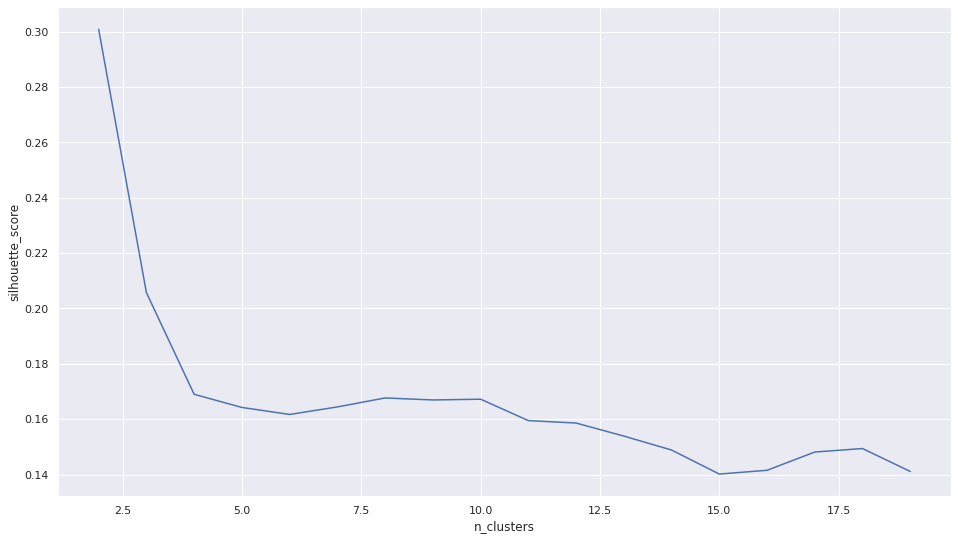

In [45]:
sb.lineplot(x='n_clusters', y='silhouette_score', data=results)

## Gráfico da Inércia

<AxesSubplot:xlabel='n_clusters', ylabel='inertia'>

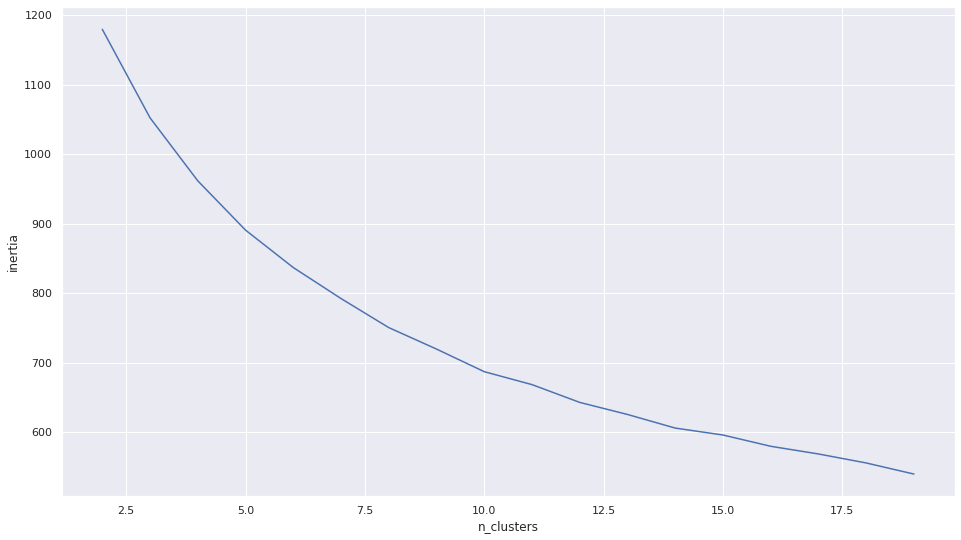

In [46]:
sb.lineplot(x='n_clusters', y='inertia', data=results)

Fixando $k=5$, obtemos os gráficos abaixo.

In [49]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(df)

df['cluster'] = kmeans.labels_


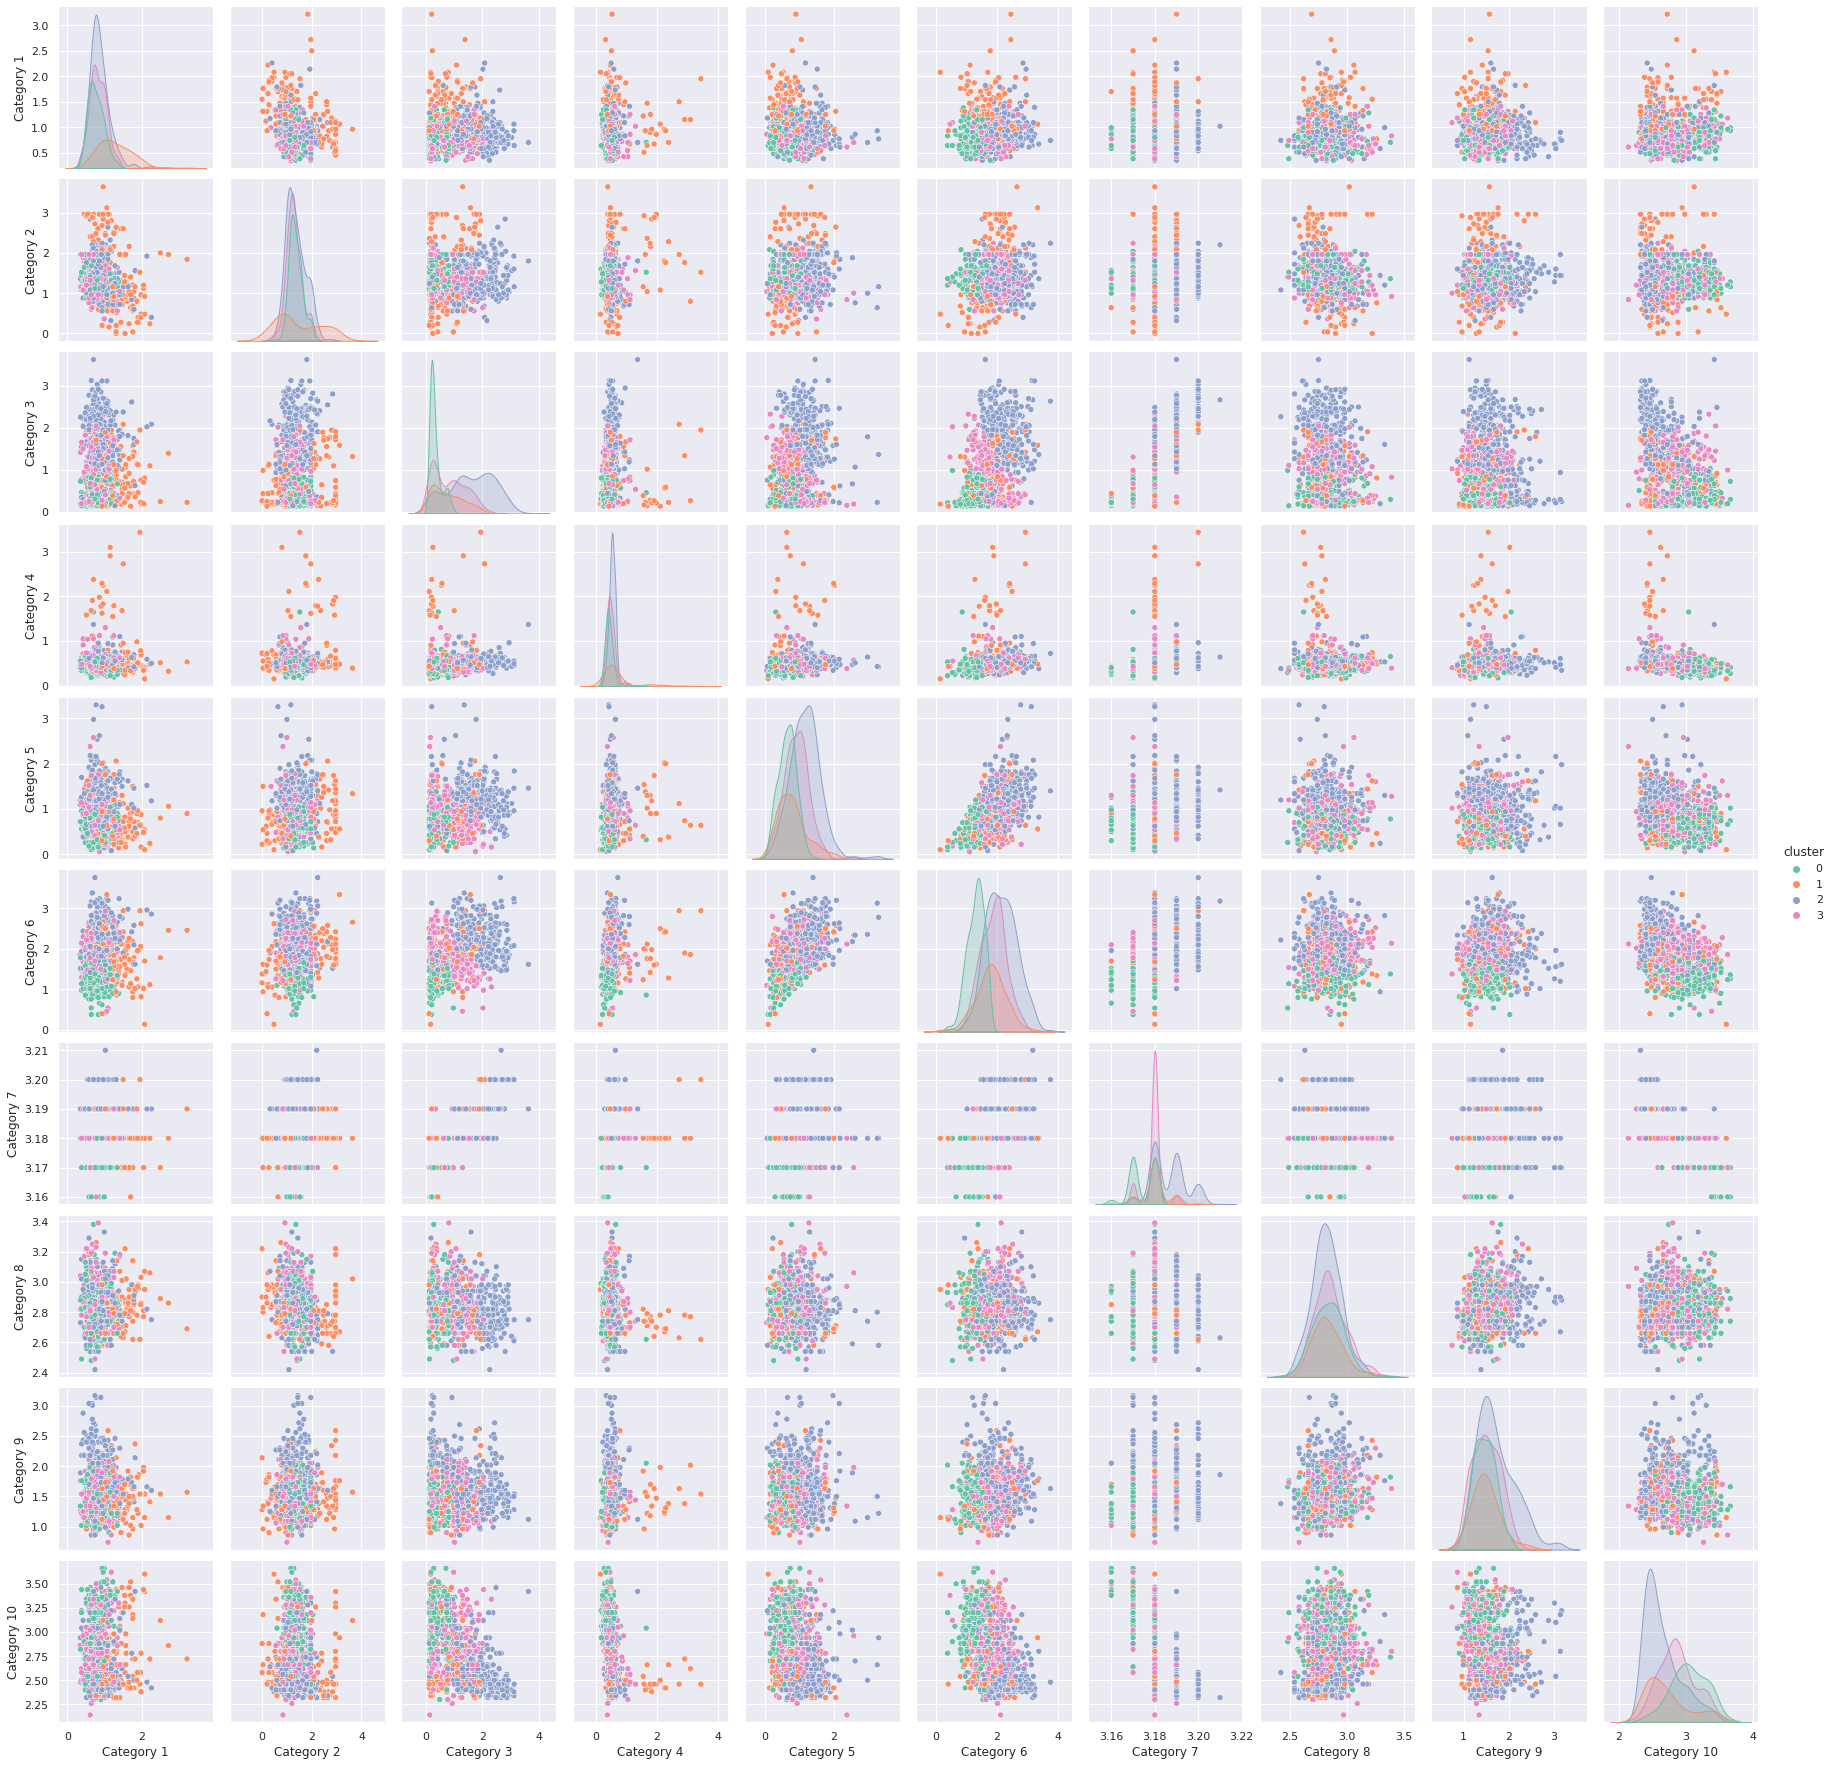

In [52]:
sb.set(rc={'figure.figsize':(16,9)})
sb.pairplot(df, hue='cluster', palette='Set2', kind='scatter')

Pela observação do gráfico, percebemos que, ainda que não haja quantidade significativa de *outliers*, os pontos estão muito próximos uns dos outros. Com isso, o algoritmo não alcança resultados impressionantes. Entretanto, 